In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
print(mnist.keys)

<built-in method keys of Bunch object at 0x7fc229fec830>


In [3]:
X, y = mnist['data'], mnist['target']

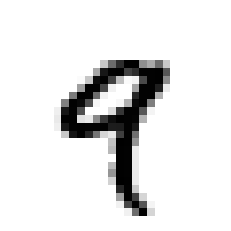

In [31]:
some_digit = X[4]
some_digit_img = some_digit.reshape(28,28)
plt.imshow(some_digit_img, cmap='binary')
plt.axis('off')
plt.show()

In [5]:
y = y.astype(np.uint8)

In [6]:
X_train, X_test, y_train, y_test = X[:6000], X[6000:], y[:6000], y[6000:]
y_train_9 = (y_train == 9)
y_test_9 = (y_test == 9)

# Predicting for a single digit

## Using Stochastic Gradient Descent 

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state = 42)
sgd_classifier.fit(X_train, y_train_9)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
sgd_y_pred =  sgd_classifier.predict(some_digit.reshape(1,784))

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import precision_score, recall_score

print("cross val score :",cross_val_score(sgd_classifier, X_train, y_train_9, cv = 10, scoring = 'accuracy'))
y_train_pred_9 = cross_val_predict(sgd_classifier,X_train, y_train_9, cv = 10)
print('confusion matrix :',confusion_matrix(y_train_9, y_train_pred_9))
print('precision score :',precision_score(y_train_9, y_train_pred_9))
print('recall score :',recall_score(y_train_9, y_train_pred_9))
# Used when recall and precision score are almost same
print('f1 score :',f1_score(y_train_9, y_train_pred_9))

cross val score : [0.96333333 0.95666667 0.945      0.95166667 0.94333333 0.94333333
 0.925      0.93666667 0.93333333 0.95166667]
confusion matrix : [[5229  170]
 [ 160  441]]
precision score : 0.7217675941080196
recall score : 0.7337770382695508
f1 score : 0.7277227722772276


In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train_9, y_train_pred_9)
roc_auc_score(y_train_9, y_train_pred_9)

0.8511448629021396

## Using Random Forest Regression

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

ran_classfier = RandomForestClassifier(random_state = 42)
# Use 'predict_proba()' mehtod for classes which do not have method 'decision_function()'
y_probas_forest = cross_val_predict(ran_classfier, X_train, y_train_9, cv = 5, method = 'predict_proba')
y_scores_forest = y_probas_forest[:,1]
# score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_9, y_scores_forest)

In [18]:
def plot_roc_curve(fpr, tpr, label = None) :
  plt.plot(fpr, tpr, linewidth = 2, label = label)
  plt.plot([0,1], [0,1], 'k')

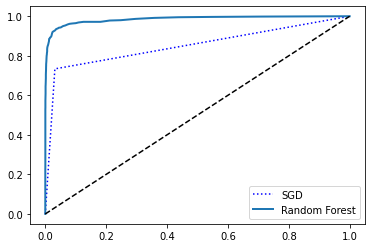

0.9853722834603931

In [28]:
plt.plot(fpr, tpr, 'b:', label = 'SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')
plt.show()
roc_auc_score(y_train_9, y_scores_forest)

# Multiclass Classification

## Using KNeighborsClassifier

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = [
              {'weights':['uniform','distance'],'n_neighbors':[3,4,5]}
]
knn_classifier = KNeighborsClassifier()
grid_search_cv = GridSearchCV(knn_classifier,param_grid,cv=5,verbose=3)
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... n_neighbors=3, weights=uniform, score=0.924, total=   9.8s
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.8s remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.936, total=   9.7s
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.5s remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.937, total=   9.7s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.939, total=   9.7s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.934, total=   9.7s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.926, total=   9.6s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.934, total=   9.7s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.940, total=   9.7s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.939, total=   9.7s
[CV] n_neighbors=3, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  4.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [36]:
print('Best params:',grid_search_cv.best_params_)
print('Best score:',grid_search_cv.best_score_)

Best params: {'n_neighbors': 4, 'weights': 'distance'}
Best score: 0.9390000000000001


In [37]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

In [38]:
from sklearn.metrics import confusion_matrix

y_pred = grid_search_cv.predict(X_test)
y_pred[:10]

array([6, 0, 1, 1, 5, 2, 8, 3, 0, 4], dtype=uint8)

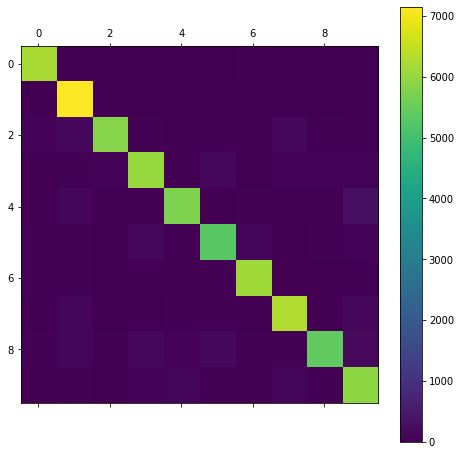

In [40]:
conf_mtx =  confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mtx)

In [41]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.93875